# QCTO - Workplace Module

### Telecom Customer Segmentation & Insights Using K-Means Clustering
#### Done By: Ntsikelelo Myesi

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [156]:
# Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

## Data Source

The dataset was downloaded from the **Kaggle public repository** and contains **anonymized telecom customer data** with 7,043 records.

### Dataset Characteristics:
- **Source**: Kaggle public repository.
- **Collection Method**: Downloaded as CSV files.
- **Size**: 7,043 customer records.
- **Scope**: Covers customer demographics, account information, service usage, financial data, and churn status.
- **Data Types**:
   - **Numerical**: Monthly Charges, Total Charges, Refunds, Revenue, Tenure, Internet Usage, Geographic Coordinates.
   - **Categorical**: Contract Type, Payment Method, Streaming Services, Tech Support, Churn Status.

All data was cleaned and preprocessed, including:
- Imputation of missing values (e.g., for internet-dependent services).
- Scaling of numerical features prior to clustering.

---

In [159]:
# Dataset manually downloaded from Kaggle.
# See description above.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [162]:
# Load the telecom churn dataset
df = pd.read_csv('telecom_customer_churn.csv')

# Quick check of data structure
print("Dataset loaded successfully with Shape:", df.shape)
df.head()

Dataset loaded successfully with Shape: (7043, 38)


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


- Dataset successfully loaded for analysis.
- The next steps will include data cleaning, exploration, preprocessing, and clustering.

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [166]:
# Check missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print(" Missing Values (%):")
print(missing_percent)

#  Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n Duplicate rows in the dataset: {duplicates}")

# Quick data info
print("\n Dataset Information:")
df.info()
df.shape

 Missing Values (%):
Churn Category                       73.463013
Churn Reason                         73.463013
Offer                                55.047565
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech Support                 21.666903
Streaming TV                         21.666903
Streaming Movies                     21.666903
Streaming Music                      21.666903
Unlimited Data                       21.666903
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
dtype: float64

 Duplicate rows in the dataset: 0

 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                   

(7043, 38)

#### Data Overview & Missing Value Analysis
- The dataset contains 7,043 rows and 38 columns.
- No duplicate rows were found —  data is structurally sound.
- The dataset includes a mix of numerical and categorical variables, with several potentially useful for clustering.
- Most important numerical features — such as Tenure in Months, Monthly Charge, Total Revenue — are complete (no missing values).
- One important feature that will likely be selected later, Avg Monthly GB Download, has ~22% missing values.
- Categorical columns like Contract, Payment Method, and Internet Type do not have missing values and may provide valuable segmentation power if encoded.
- Churn-related columns (Churn Category, Churn Reason) have high missingness and will be kept in the dataset but excluded from clustering features.

In [169]:
# Filter rows with missing Avg Monthly GB Download
missing_download = df[df['Avg Monthly GB Download'].isnull()]

# Check their Contract, Payment Method, Internet Type
print("Contract Types:\n", missing_download['Contract'].value_counts())
print("\nPayment Methods:\n", missing_download['Payment Method'].value_counts())
print("\nInternet Types:\n", missing_download['Internet Type'].value_counts())
print("\nInternet Services:\n", missing_download['Internet Service'].value_counts())
print("\nCustomer Status:\n", missing_download['Customer Status'].value_counts())

Contract Types:
 Contract
Two Year          642
Month-to-Month    518
One Year          366
Name: count, dtype: int64

Payment Methods:
 Payment Method
Credit Card        929
Bank Withdrawal    454
Mailed Check       143
Name: count, dtype: int64

Internet Types:
 Series([], Name: count, dtype: int64)

Internet Services:
 Internet Service
No    1526
Name: count, dtype: int64

Customer Status:
 Customer Status
Stayed     1231
Joined      182
Churned     113
Name: count, dtype: int64


In [171]:
# Checking the columns uniqune values when "Avg Monthly GB Download" in missing.
print(missing_download['Internet Service'].unique())
print(missing_download['Internet Type'].unique())
print(missing_download['Payment Method'].unique())
print(missing_download['Contract'].unique())
print(missing_download['Customer Status'].unique())
print(missing_download['Monthly Charge'].unique())

['No']
[nan]
['Bank Withdrawal' 'Credit Card' 'Mailed Check']
['One Year' 'Month-to-Month' 'Two Year']
['Stayed' 'Joined' 'Churned']
[ 25.2   19.85  20.35  20.4   19.6   19.7   20.45  20.55  25.1   20.3
  25.5   19.4   19.95  20.5   19.55  25.35  20.05  25.3   19.25  19.8
  20.15  20.1   19.75  24.35  21.05  19.05  26.4   19.9   19.65  19.35
  20.    25.15  19.3   24.45  20.9   19.5   25.6   20.75  24.25  25.25
  24.75  19.15  20.2   23.9   25.9   25.45  19.2   18.85  18.7   24.15
  21.    19.    20.25  25.05  20.65  23.75  20.6   25.4   19.1   18.55
  19.45  24.85  25.7   25.65  24.6   23.95  24.8   23.05  26.35  26.1
  20.7   21.1   24.7   18.95  -5.    24.4   24.95  24.2   25.    20.8
  24.05  20.85  -1.    23.3   26.    25.75  26.2   24.55  24.3   -2.
  -4.    21.15  23.65  -8.    24.    26.8   21.3   25.95  18.8   24.9
  25.55  25.8   24.5   21.25  23.85  20.95  26.9   24.1   -6.    -3.
  24.65  26.25  25.85  23.55  -7.    -9.   -10.    18.9   26.3   26.5
  23.4   23.5   26.45  18

#### Missing Value Handling & Strategic Feature Consideration

- Multiple features had missing values, notably:
  - `Avg Monthly GB Download`
  - Service-related columns such as `Streaming TV`, `Streaming Movies`, `Streaming Music`, `Online Security`, `Online Backup`, `Premium Tech Support`, and `Internet Type`
- Upon investigation, all rows with missing values in these features corresponded to customers with `Internet Service = No`. This means these customers do not subscribe to internet services, making their usage of internet-based services logically inapplicable rather than unknown.
- Therefore:
  - `Avg Monthly GB Download` was imputed with `0`, since non-internet users have no data usage.
  - The other categorical service-related features were imputed with `"No Internet"` to clearly distinguish them from customers who do have internet but chose not to use specific services (which are recorded as `"No"`).
- **Why Imputation Was the Best Choice**:
  - Dropping these rows would have eliminated a meaningful segment of the customer base (non-internet users), skewing the analysis toward only internet users.
  - Imputation helps preserve the integrity of the dataset, retain the diversity of customer behaviors, and allows for accurate segmentation and modeling.

In [174]:
#Impute Avg Monthly GB Download with 0 for Non-Internet Users
# Impute missing values in 'Avg Monthly GB Download' with 0
df['Avg Monthly GB Download'].fillna(0, inplace=True)

# Define columns that should be imputed
impute_columns = ["Streaming TV", "Streaming Movies", "Streaming Music",
                  "Online Security", "Online Backup", "Premium Tech Support","Internet Type"]

# For any remaining missing values, impute with "No" (indicating the service is not taken)
df[impute_columns] = df[impute_columns].fillna("No Internet") 
# Confirm there are no more missing values in that column
print("Remaining missing values in 'Avg Monthly GB Download':", df['Avg Monthly GB Download'].isnull().sum())

Remaining missing values in 'Avg Monthly GB Download': 0


/var/folders/47/jvrbf7v54dz4l7f1b3h8z4jm0000gn/T/ipykernel_15772/482926227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg Monthly GB Download'].fillna(0, inplace=True)


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

#### Distribution Analysis of Key Numerical Features
 #### Numerical Feature Selection Summary

The selected numerical features were chosen based on their relevance to customer behavior, engagement, and potential revenue generation. These features provide quantifiable insights into how customers use services and spend over time.

- **Tenure in Months** – Measures customer longevity and loyalty.
- **Monthly Charge** – Captures regular billing, reflecting the customer’s pricing plan.
- **Total Charges** – Represents overall spending and value.
- **Avg Monthly GB Download** – Indicates internet engagement and digital service usage.
- **Total Extra Data Charges** – Shows additional internet usage beyond plans.
- **Total Long Distance Charges** – Reflects international or premium calling activity.
- **Total Refunds** – May signal dissatisfaction or service issues.
- **Total Revenue** – Summarizes total contribution per customer.
- **Number of Referrals** – Highlights customer advocacy and potential influence.

These features collectively capture financial behavior, usage intensity, and service engagement — essential for clustering and customer segmentation.

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


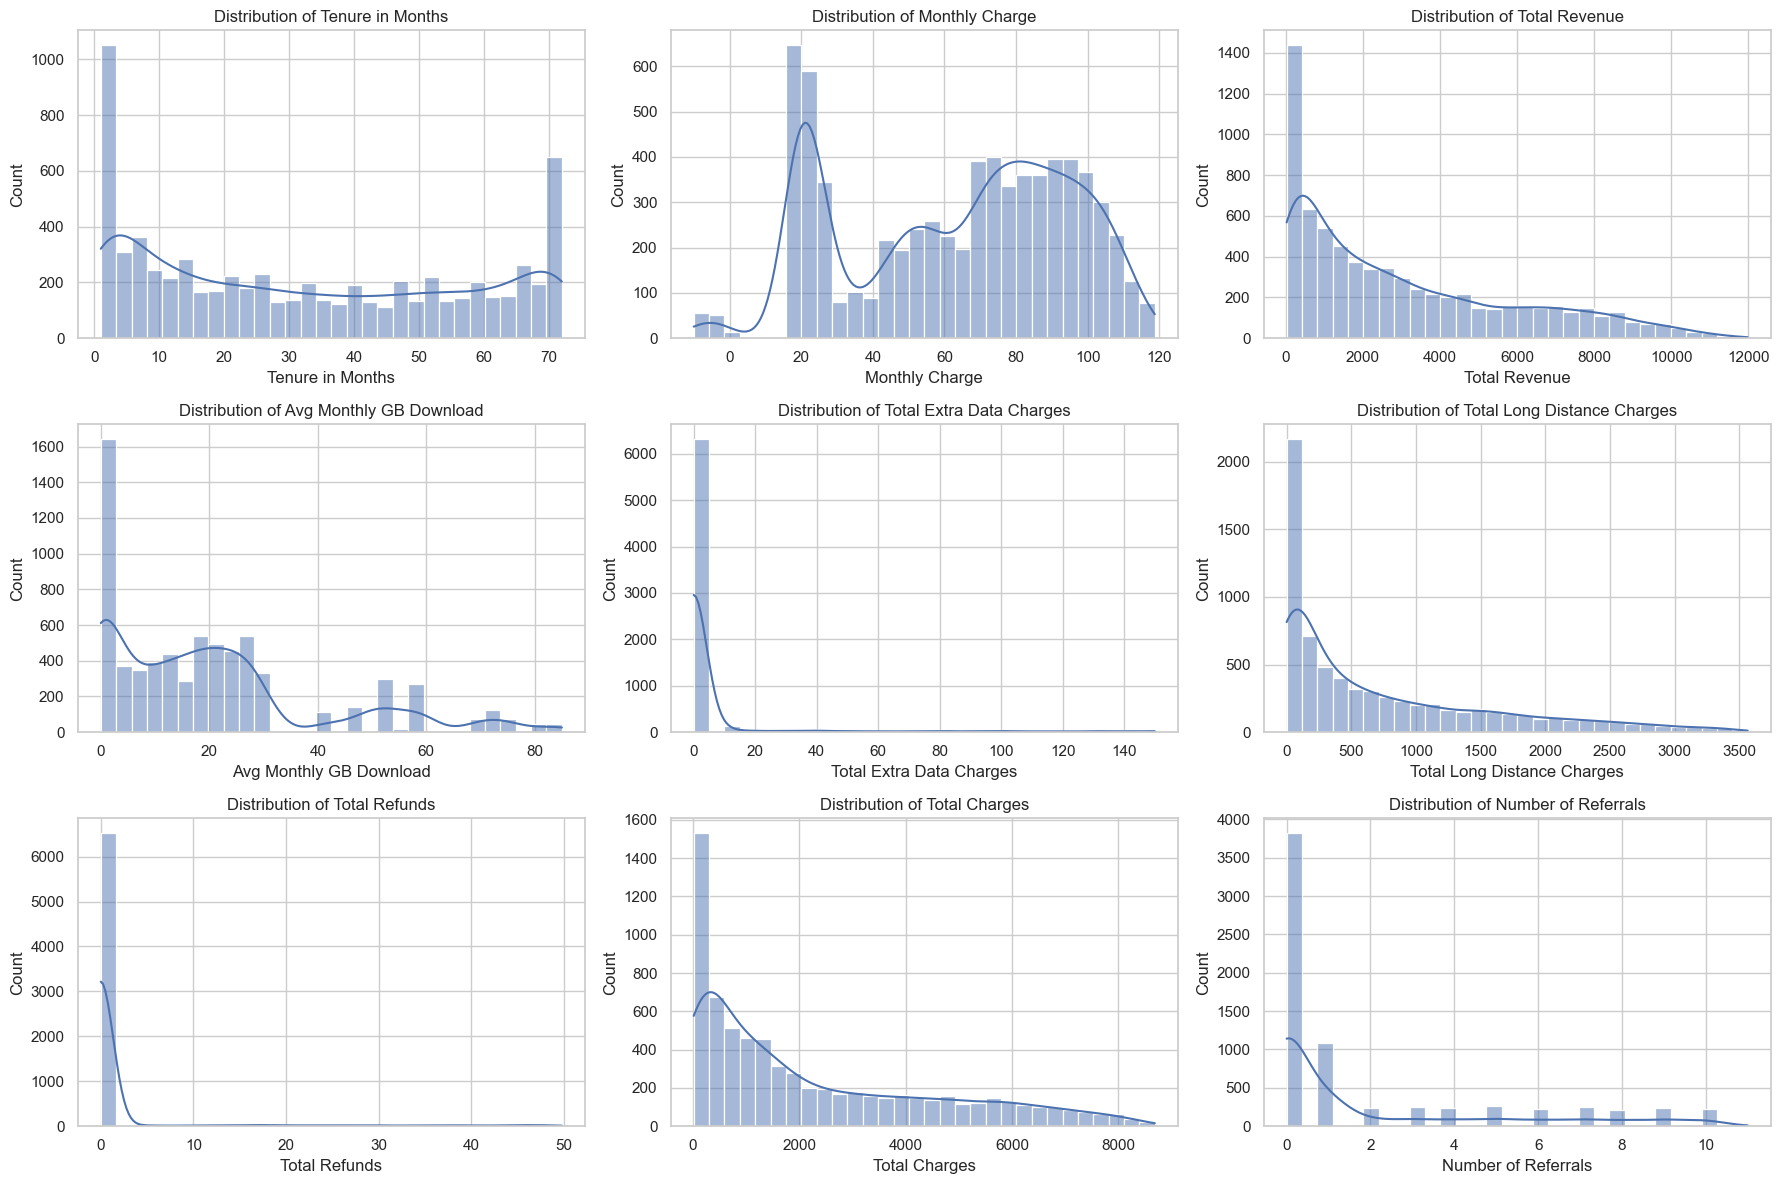

In [180]:
# List of important numeric features to explore
numeric_features = [
    'Tenure in Months',
    'Monthly Charge',
    'Total Revenue',
    'Avg Monthly GB Download',
    'Total Extra Data Charges',
    'Total Long Distance Charges',
    'Total Refunds',
    'Total Charges',
    'Number of Referrals'
]

# Set up the plot grid
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [181]:
# Group tenure into bins and count customers in each range
tenure_counts = df['Tenure in Months'].value_counts().sort_index()
print(tenure_counts.head(36))  # First 20 months to see short-tenure distribution
print(tenure_counts.tail(20))  # Last 20 months to see long-tenure distribution

Tenure in Months
1     613
2     238
3     200
4     176
5     133
6     110
7     131
8     123
9     119
10    127
11     99
12    117
13    109
14     76
15     99
16     80
17     87
18     97
19     73
20     71
21     63
22     90
23     85
24     94
25     79
26     79
27     72
28     57
29     72
30     72
31     65
32     69
33     64
34     65
35     88
36     50
Name: count, dtype: int64
Tenure in Months
53     70
54     68
55     64
56     80
57     65
58     67
59     60
60     76
61     76
62     70
63     72
64     80
65     76
66     89
67     98
68    100
69     95
70    119
71    170
72    362
Name: count, dtype: int64


***Tenure in Months***
- Highest count at 1 month (613 customers), indicating many new or short-term users.
- Sharp drop between months 2–6 suggests high early churn.
- Visible spikes at 12 and 24 months likely align with 1- and 2-year contracts.
- A major peak at 72 months (362 customers) suggests a loyal long-term customer segment.

***Monthly Charge***
- Bimodal distribution points to two dominant customer groups, possibly low- and high-tier plans.

***Total Revenue and Total Charges***
- Right-skewed with a few high-value customers.
- Scaling will be necessary to prevent these features from overpowering others.

***Avg Monthly GB Download***
- Many zeros due to non-internet users.
- Higher values indicate active internet usage and support segmentation based on digital engagement.

***Total Long Distance Charges***
- Most values are low, with a few heavy users indicating niche calling behavior.

***Total Extra Data Charges***
- Majority have zero, but a few show very high charges, pointing to heavy data users.

***Total Refunds***
- Most customers have no refunds, but high refund values may indicate dissatisfaction or service issues.

***Number of Referrals***
- Mostly zero; a small number of customers made several referrals, reflecting high engagement or advocacy.

Customer Status  Churned  Joined  Stayed
Tenure Group                            
0-12 months         1037     454     695
13-24 months         294       0     730
25-36 months         180       0     652
37-48 months         145       0     617
49-60 months         120       0     712
61-72 months          93       0    1314
72+ months             0       0       0


/var/folders/47/jvrbf7v54dz4l7f1b3h8z4jm0000gn/T/ipykernel_15772/16182756.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_analysis = df.groupby(['Tenure Group', 'Customer Status']).size().unstack()


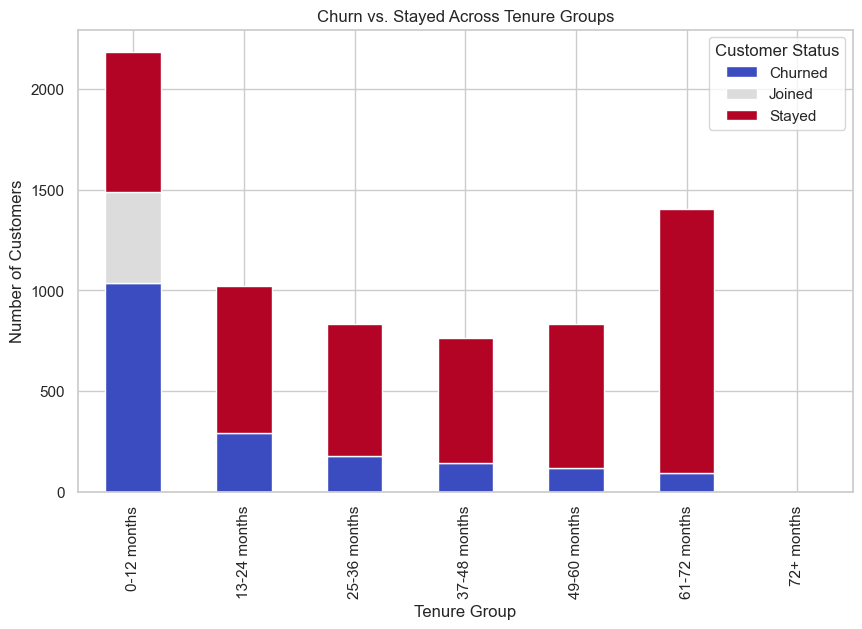

In [185]:
# Group tenure into categories (0-12, 13-24, etc.)
df['Tenure Group'] = pd.cut(df['Tenure in Months'], bins=[0, 12, 24, 36, 48, 60, 72, float('inf')], 
                            labels=['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61-72 months', '72+ months'])

# Count stayed vs. churned in each tenure group
tenure_churn_analysis = df.groupby(['Tenure Group', 'Customer Status']).size().unstack()

# Display the result
print(tenure_churn_analysis)

# Optional: Plot results
#import matplotlib.pyplot as plt
tenure_churn_analysis.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("Churn vs. Stayed Across Tenure Groups")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Customers")
plt.legend(title="Customer Status")
plt.show()

#### Churn vs. Stayed Across Tenure Groups – Summary
- 0-12 months has the highest churn: Many customers leave early, making this the most vulnerable group. New customers enter here, but retention is low.
- Churn significantly drops after 12 months: Customers who renew their first contract are more likely to stay long-term.
- Long-tenure customers (61+ months) rarely churn: The majority of these customers have remained with the company for years, indicating strong loyalty.
- Retention focus should be on early-stage customers: Strategies should prioritize the first 12 months to prevent early churn.

/var/folders/47/jvrbf7v54dz4l7f1b3h8z4jm0000gn/T/ipykernel_15772/2131268712.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_reasons_by_tenure = churned_customers.groupby(['Tenure Group', 'Churn Reason']).size().unstack()


<Figure size 1200x600 with 0 Axes>

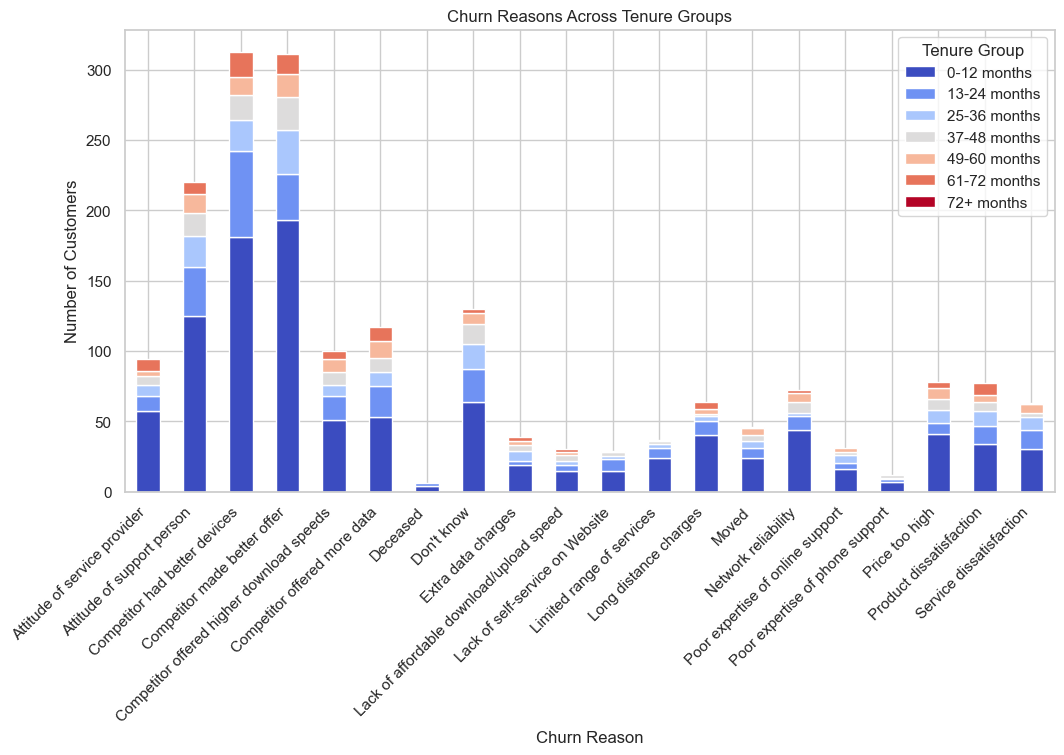

In [188]:
# Check which tenure groups have the highest churn for each reason
churned_customers = df[df['Customer Status'] == 'Churned']

# Group by Tenure Group and Churn Reason, then count occurrences
churn_reasons_by_tenure = churned_customers.groupby(['Tenure Group', 'Churn Reason']).size().unstack()

# Display the result
#print(churn_reasons_by_tenure)

# Optional: Plot the results
#import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
churn_reasons_by_tenure.T.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Churn Reasons Across Tenure Groups")
plt.xlabel("Churn Reason")
plt.ylabel("Number of Customers")
plt.legend(title="Tenure Group", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

#### Churn Reasons Across Tenure Groups – Summary
- 0-12 months churn is driven by competition: Most customers leave due to better offers, faster speeds, and more data from competitors. Poor service experience also plays a role.
- 13-36 months churn is influenced by both competitors and service issues: Network reliability, support experience, and pricing become key churn drivers.
- 37+ months churn shifts towards service dissatisfaction and pricing: Competitor influence decreases, and issues like product dissatisfaction, high prices, and network reliability cause churn. Long-tenure customers also leave due to relocation (“Moved”).
- Retention strategy should focus on early-stage churn: Price-matching and better onboarding could help reduce first-year churn, while long-tenure retention should focus on service quality and loyalty incentives.

<Figure size 1200x600 with 0 Axes>

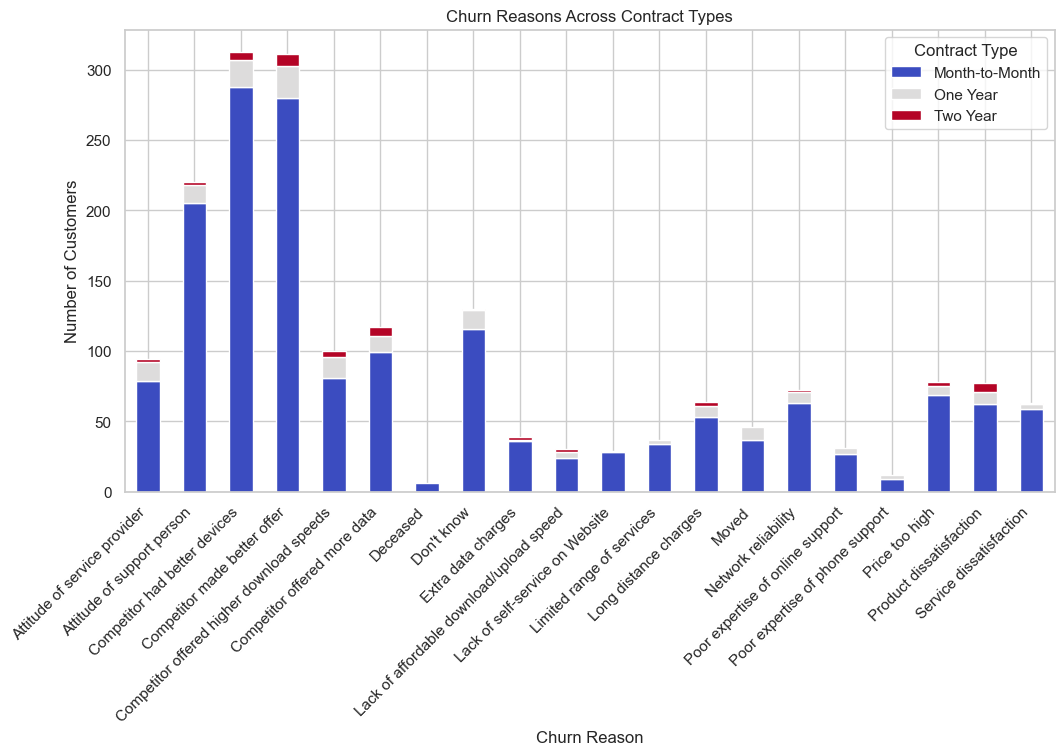

In [191]:
# Filter churned customers
churned_customers = df[df['Customer Status'] == 'Churned']

# Group by Contract Type and Churn Reason
churn_reasons_by_contract = churned_customers.groupby(['Contract', 'Churn Reason']).size().unstack()

# Display the result
#print(churn_reasons_by_contract)

# Optional: Plot results
#import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
churn_reasons_by_contract.T.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Churn Reasons Across Contract Types")
plt.xlabel("Churn Reason")
plt.ylabel("Number of Customers")
plt.legend(title="Contract Type", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

#### Churn Reasons by Contract Type – Summary
- Month-to-Month customers churn the most and are highly affected by competitor pricing, better devices, and faster speeds.
- One-Year contract churners also cite competitors but show some dissatisfaction with service and pricing.
- Two-Year contract holders rarely churn, but when they do, it’s mostly due to service dissatisfaction, network reliability, or pricing issues.
- Short-term contracts (Month-to-Month) are the most volatile, while longer contracts (One-Year & Two-Year) have more stable customers.


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---
## Choice of Model: K-Means Clustering

For this project, we selected **K-Means Clustering** as the primary modeling technique for the following reasons:

- **Suitability for Unsupervised Learning**: The project does not have labeled data. K-Means is a well-known unsupervised algorithm for discovering hidden patterns and grouping similar observations.
- **Scalability**: K-Means is efficient and scalable for datasets of moderate to large size.
- **Interpretability**: The resulting clusters are easy to interpret and communicate to business stakeholders.
- **Numerical Feature Compatibility**: The dataset primarily consists of numerical features (e.g., charges, tenure, usage), which aligns well with the distance-based nature of K-Means.

The clustering results help answer key business questions related to customer behavior, retention, upselling, and service usage.

### Notes:
- The optimal number of clusters was determined using the **Elbow Method** and **Silhouette Score**.
- Preprocessing steps like feature scaling and handling of missing values were performed prior to applying the K-Means algorithm.

---

 ### Feature Engineering - Selection & Correlation Analysis 

---

**Choice of Model:**  
The objective of this project is to segment telecom customers into meaningful groups. Given that no labeled data is available, **K-Means Clustering** was chosen as the modeling technique due to its ability to group customers based on similarities in their behavior and characteristics.

**Selected Features for Clustering:**  
The following features were selected after careful consideration to capture essential aspects of customer behavior, spending patterns, and engagement:
- `Tenure in Months`
- `Monthly Charge`
- `Total Revenue`
- `Avg Monthly GB Download`
- `Total Extra Data Charges`
- `Total Long Distance Charges`
- `Total Refunds`
- `Total Charges`
- `Number of Referrals`

These features provide a balanced representation of:
- Customer tenure and loyalty.
- Financial contribution (charges, revenue, refunds).
- Service consumption patterns (internet usage, long distance, extra data usage).
- Engagement level (referrals).

The model was "trained" by fitting the K-Means algorithm to the dataset using these selected features to identify customer clusters based on patterns in the data.

In [290]:
selected_features = [
    'Tenure in Months', 
    'Monthly Charge', 
    'Total Revenue', 
    'Avg Monthly GB Download', 
    'Total Extra Data Charges', 
    'Total Long Distance Charges', 
    'Total Refunds', 
    'Total Charges', 
    'Number of Referrals'
]

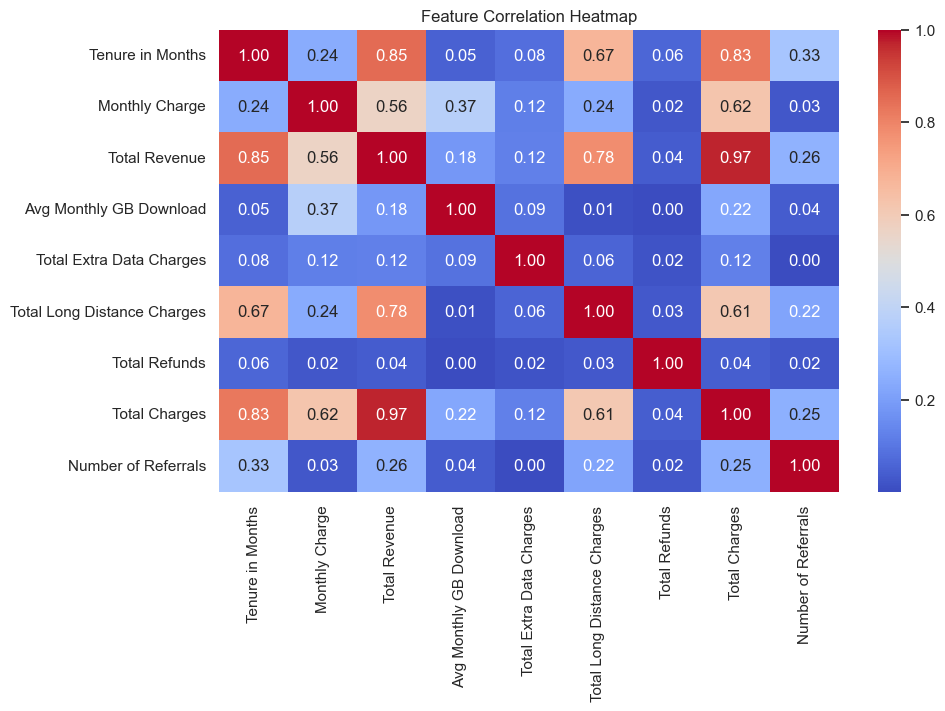

In [292]:
# Compute correlation matrix for selected features.
plt.figure(figsize=(10, 6))
corr_matrix = df[selected_features].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Feature Selection & Correlation Analysis – Summary
- Total Revenue is highly correlated with Total Charges (0.97), so we drop Total Revenue to avoid redundancy.
- Tenure in Months is strongly correlated with Total Revenue (0.85) but represents time rather than spending, so it remains.
- Total Long Distance Charges (0.78 correlation with Total Revenue) is kept, as it captures specific calling behavior.
- Monthly Charge, Avg Monthly GB Download, and Number of Referrals show low/moderate correlations, meaning they provide independent information.
- Drop Total Revenue from clustering features.
- I wii keep all other selected features.

In [201]:
# Define the final selected features (excluding Total Revenue)
final_features = [
    'Tenure in Months', 
    'Monthly Charge', 
    'Avg Monthly GB Download', 
    'Total Extra Data Charges', 
    'Total Long Distance Charges', 
    'Total Refunds', 
    'Total Charges', 
    'Number of Referrals'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df_scaled = df.copy()
df_scaled[final_features] = scaler.fit_transform(df[final_features])

# Display scaled data
print(df_scaled[final_features].head())

# Verify mean and standard deviation
scaled_summary = df_scaled[final_features].describe()
print(scaled_summary)

   Tenure in Months  Monthly Charge  Avg Monthly GB Download  \
0         -0.952994        0.064221                -0.221154   
1         -0.952994       -2.166367                -0.515019   
2         -1.156740        0.330225                 0.464533   
3         -0.789997        1.102599                -0.808885   
4         -1.197489        0.650712                -0.466042   

   Total Extra Data Charges  Total Long Distance Charges  Total Refunds  \
0                 -0.273300                    -0.434195      -0.248313   
1                  0.125055                    -0.771190       4.602325   
2                 -0.273300                    -0.725844      -0.248313   
3                 -0.273300                    -0.457641      -0.248313   
4                 -0.273300                    -0.858681      -0.248313   

   Total Charges  Number of Referrals  
0      -0.744500             0.016039  
1      -0.766962            -0.650409  
2      -0.882382            -0.650409  
3   

#### Feature Scaling – Summary
- Clustering algorithms like DBSCAN & K-Means rely on distance calculations, making feature scaling essential.
- Large-scale features (e.g., Total Charges in thousands) could dominate smaller-scale features (e.g., Number of Referrals in single digits), leading to biased clustering.
- Standardization (Z-score scaling) ensures all features contribute equally by transforming them to have mean = 0 and standard deviation = 1.
- StandardScaler is used to scale the selected features before clustering.
---
- Feature scaling was successfully applied using StandardScaler.
- All features now have mean = 0 and standard deviation = 1, preventing larger-scale features from dominating clustering.
- Outliers remain but in a controlled form, ensuring unbiased cluster formation.
---

## Model Training & Evaluation

### Model Training
The K-Means algorithm was applied to the preprocessed dataset. The optimal number of clusters was determined using:

- **Elbow Method**: To identify the ideal number of clusters based on the within-cluster sum of squares (WCSS).
- After analysis, **k = 5** clusters were selected as the most appropriate.

### Evaluation of Clustering
Since K-Means is an unsupervised algorithm, the model was evaluated through:

- **Visual Inspection**: Using Power BI visualizations to observe distinct patterns among the clusters.
- **Business Interpretability**: Interpreting clusters in the context of telecom operations, churn, revenue, and digital service usage.

This approach ensured that the identified clusters were both meaningful and actionable for business strategies.

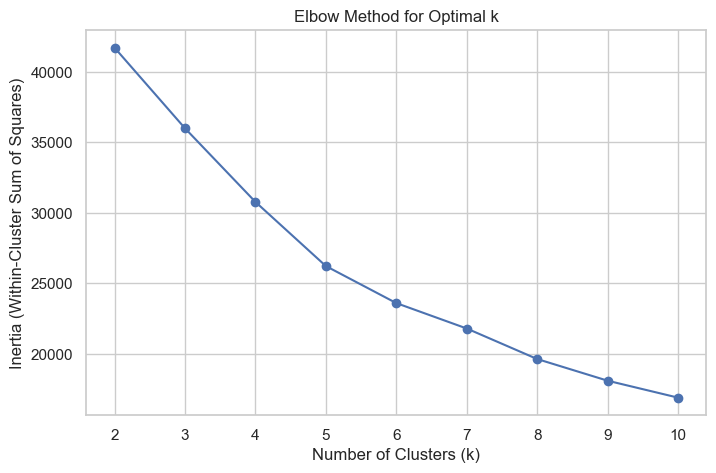

In [204]:
# Find optimal K using the elbow method
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[final_features])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

#### Optimal Cluster Selection – Summary
- The Elbow Method was used to determine the best number of clusters (k).
- The sharpest decrease in inertia occurs between k=2 and k=5, after which the slope flattens.
- The “elbow point” appears at k=5, indicating that adding more clusters provides minimal improvement.
- Choosing k=5 ensures balanced segmentation while avoiding overfitting.

In [206]:
# Apply K-Means with optimal k (replace X with the chosen number)
optimal_k = 5  # Replace X with the best k from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled[final_features])

# Count clusters
kmeans_clusters = df_scaled['KMeans_Cluster'].value_counts()
print("K-Means Cluster Distribution:")
print(kmeans_clusters)

K-Means Cluster Distribution:
KMeans_Cluster
0    2670
2    1857
1    1840
3     348
4     328
Name: count, dtype: int64


/var/folders/47/jvrbf7v54dz4l7f1b3h8z4jm0000gn/T/ipykernel_15772/2771952909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_scaled['KMeans_Cluster'], palette="coolwarm")


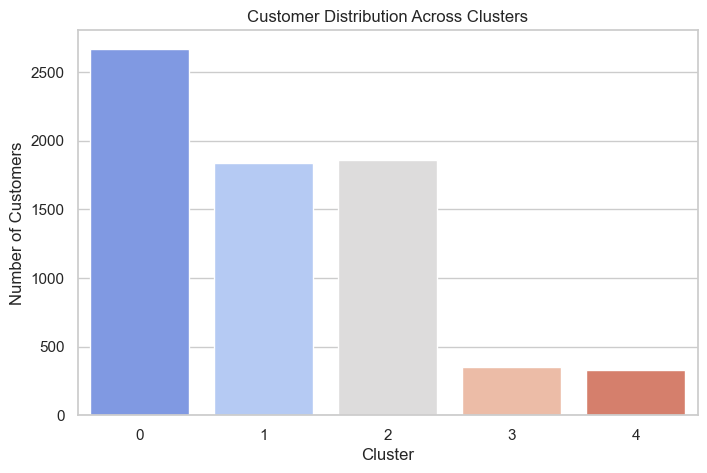

In [208]:
# Plot the number of customers in each cluster
plt.figure(figsize=(8,5))
sns.countplot(x=df_scaled['KMeans_Cluster'], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution Across Clusters")
plt.show()

#### Key Observations:
- Cluster 0 (Largest group, ~2700 customers) → These are the short-term, budget-conscious users.
- Cluster 1 & 2 (Medium-sized clusters, ~1800 customers each) → Represent mid-tier and high-value customers.
- Clusters 3 & 4 (Smallest groups, ~300-400 customers) → Represent specialized segments (e.g., high long-distance callers, refund-heavy users).

#### Key Takeaways:
- Cluster 0 dominates the customer base, meaning many customers have short tenure & low engagement.
- The company needs strategies to retain and convert them to long-term users.
- Cluster 4 (refund-heavy) is small but critical to investigate further for customer dissatisfaction issues.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [213]:
# Merge the cluster labels into the original dataset
df['KMeans_Cluster'] = df_scaled['KMeans_Cluster']

# Save labeled dataset for PowerBI
df.to_csv("customer_clusters_labeled.csv", index=False)

# Display first few rows to confirm
df.head()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Tenure Group,KMeans_Cluster
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,0-12 months,0
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,0-12 months,4
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,0-12 months,0
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,13-24 months,0
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,0-12 months,0


- Cluster labelled data was successfully megged with original dataset for evaluation and validation
- The labelled dataset is then saved for PowerBI dashboard insights and analysis

>### Customer profiling 

Cluster Profiles (Feature Averages):
                Tenure in Months  Monthly Charge  Avg Monthly GB Download  \
KMeans_Cluster                                                              
0                      -0.748347        0.235992                 0.320352   
1                      -0.096417       -1.288720                -0.870586   
2                       1.060200        0.835776                 0.347060   
3                       0.406252        0.490897                 0.325763   
4                       0.199167        0.055726                -0.034501   

                Total Extra Data Charges  Total Long Distance Charges  \
KMeans_Cluster                                                          
0                              -0.185423                    -0.582919   
1                              -0.257929                    -0.122796   
2                              -0.211734                     0.903337   
3                               4.007878                  

<Figure size 1200x600 with 0 Axes>

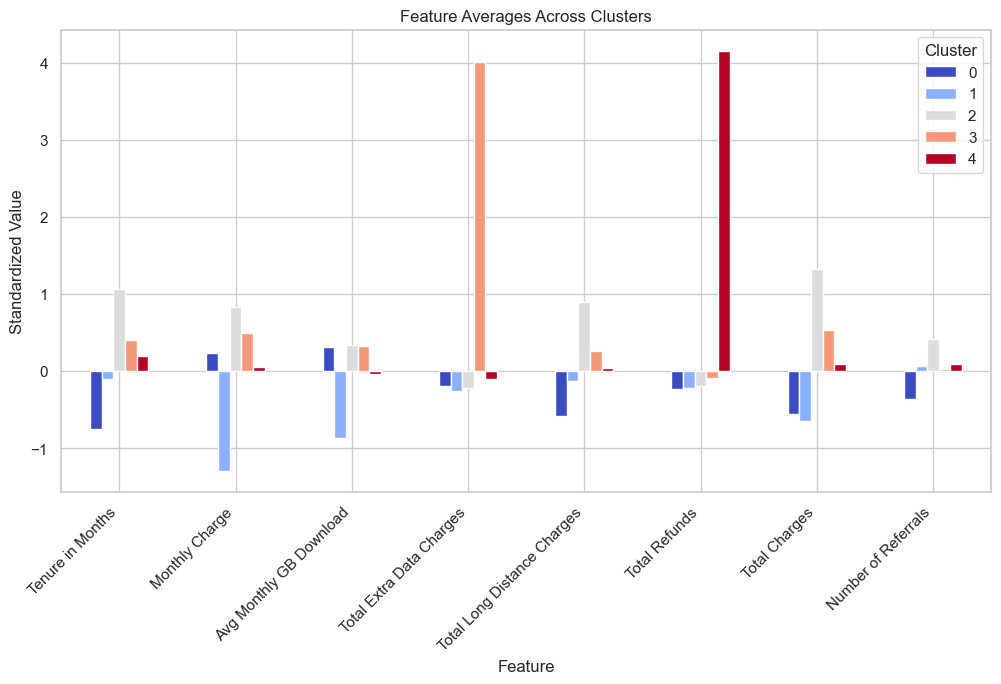

In [256]:
# Get the mean values of each feature per cluster
cluster_profiles = df_scaled.groupby('KMeans_Cluster')[final_features].mean()

# Display cluster profile summary
#import pandas as pd
#import matplotlib.pyplot as plt

print("Cluster Profiles (Feature Averages):")
print(cluster_profiles)

# Plot feature differences across clusters
plt.figure(figsize=(12, 6))
cluster_profiles.T.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title("Feature Averages Across Clusters")
plt.ylabel("Standardized Value")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster")
plt.show()

#### Cluster 0: Budget-Conscious Data Hoppers

- Short-tenure customers with higher-than-average data usage but minimal extra purchases. 
- They avoid long commitments and frequently switch providers for better deals. They rarely use long-distance calling services.<br> 

 ***Retention Strategy:*** Progressive loyalty discounts, exclusive perks (extra GB, streaming services), flexible semi-commitment plans, and AI-powered personalized retention offers.

#### Cluster 1: Lower-Spending, Mid-Tenure Customers

- Stable customers with moderate tenure and lower monthly charges.
- They spend less overall and are not highly engaged but are not at immediate churn risk.<br> 

 ***Retention Strategy:*** Upsell premium plans, encourage add-ons (extra data, entertainment bundles), and introduce targeted promotions based on usage history.

#### Cluster 2: High-Value, Long-Tenure Customers

- The most loyal and profitable customers with the highest monthly charges and frequent referrals.
- They contribute long-term revenue and are highly engaged.<br> 

 ***Retention Strategy:*** VIP customer treatment (exclusive discounts, premium support), loyalty programs (free add-ons for long-time customers), and proactive personalized offers.

#### Cluster 3: High Long-Distance Callers (Low Tenure)

- Newer customers who heavily use long-distance calling services, likely for international or business purposes.<br> 

 ***Retention Strategy:*** Special long-distance call packages, discounts for continued usage, and bundled plans with international calling perks.

#### Cluster 4: Refund-Heavy, Dissatisfied Customers

- Customers with a moderate tenure but the highest refund requests, indicating service dissatisfaction.<br> 

 ***Retention Strategy:*** Address refund reasons proactively, improve billing transparency & customer support, and offer retention discounts or goodwill gestures.

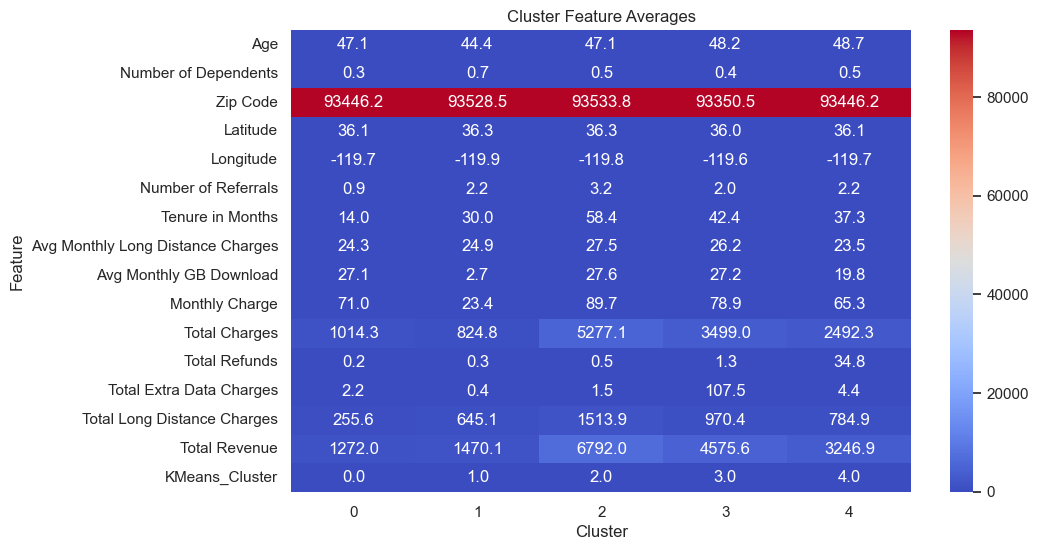

In [259]:
# To Ensure we only include numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Compute cluster feature averages (excluding non-numeric columns)
cluster_means = df.groupby('KMeans_Cluster')[numerical_cols].mean()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cluster_means.T, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Cluster Feature Averages")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()

#### Cluster Feature Averages (Heatmap Summary)

This heatmap presents the average values of key features per cluster, helping to interpret behavioral and financial differences between customer segments:
- Cluster 0:
	- Lowest tenure (14 months)
	- Modest usage: Avg GB download (27.1), Monthly Charge (R71)
	- Lowest revenue and total charges, suggesting light users with limited service uptake
- Cluster 1:
	- Medium tenure (30 months)
	- Very low data usage (2.7 GB), low Monthly Charge (R23)
	- Indicates customers with internet but minimal engagement, or possibly non-internet users
- Cluster 2:
	- Highest tenure (58.4 months)
	- High engagement: Avg GB (27.6), Monthly Charge (R89.7)
	- Top revenue (R6792), highest total charges → loyal, valuable customers
- Cluster 3:
	- Moderate tenure (42.4 months)
	- Notable long-distance usage (Avg R26.2, Total R970.4)
	- High refunds (1.3), moderate spending → Possible billing or support issues
- Cluster 4:
	- Tenure between Clusters 1 and 3
	- High refund rate (34.8), suggesting significant dissatisfaction
	- Lower average usage and spending vs. Cluster 2 → Potential churn risk group

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


/var/folders/47/jvrbf7v54dz4l7f1b3h8z4jm0000gn/T/ipykernel_15772/1009325623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_scaled['KMeans_Cluster'], y=df_scaled['Total Charges'], palette="coolwarm")


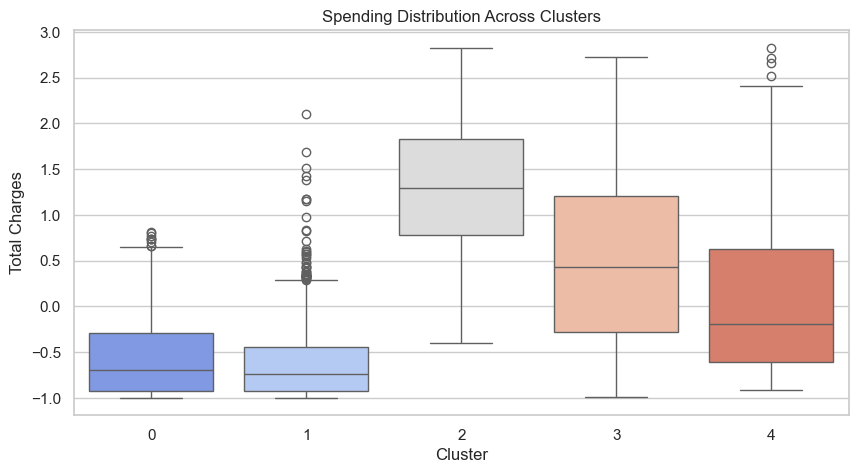

In [263]:
#Please use code cells to code in and do not forget to comment# Boxplot for Total Charges across clusters
plt.figure(figsize=(10,5))
sns.boxplot(x=df_scaled['KMeans_Cluster'], y=df_scaled['Total Charges'], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Total Charges")
plt.title("Spending Distribution Across Clusters")
plt.show() 

#### Spending Distribution Across Clusters (Boxplot Summary)
- Cluster 2
Highest spending group overall. Their total charges are consistently high with a tight distribution — indicates high-value, long-tenure customers with stable service usage.
- Cluster 3
Moderate-to-high spenders with a wider spread and many outliers. Reflects a diverse group — some heavy users, some not. Possibly newer adopters starting to spend more.
- Cluster 4
Moderate spenders with slightly lower charges than Cluster 3. Has a visible spread and several outliers. May include refund-prone or price-sensitive customers.
- Clusters 0 & 1
Both show low spending and a tight distribution below 0 (standardized). Indicates limited service usage, low revenue generation, and possibly entry-level or disengaged customers.

/var/folders/47/jvrbf7v54dz4l7f1b3h8z4jm0000gn/T/ipykernel_15772/1408077991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_scaled['KMeans_Cluster'], y=df_scaled['Tenure in Months'], palette="coolwarm")


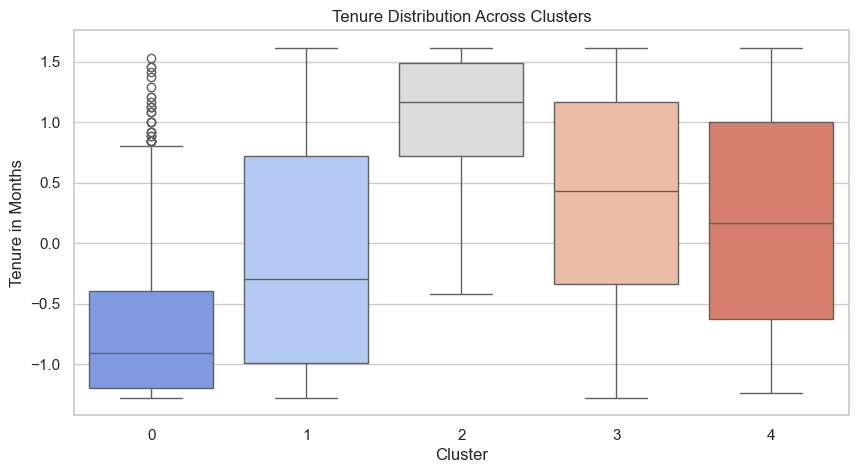

In [266]:
# Boxplot for Tenure across clusters
plt.figure(figsize=(10,5))
sns.boxplot(x=df_scaled['KMeans_Cluster'], y=df_scaled['Tenure in Months'], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Tenure in Months")
plt.title("Tenure Distribution Across Clusters")
plt.show()

#### Tenure Distribution Across Clusters (Boxplot Summary)
- Cluster 2
Longest-tenure customers on average. Most users have been with the company for an extended period, showing high loyalty and stability.
- Clusters 3 & 4
Mid-tenure groups with broad variation. These clusters likely contain a mix of retained and recently acquired customers.
- Cluster 1
Short-to-mid tenure customers. Distribution suggests this group is relatively new but not entirely early-stage.
- Cluster 0
Dominated by very short-tenure customers, with the lowest average and many outliers. Indicates a group of new, trial-stage, or transient users.

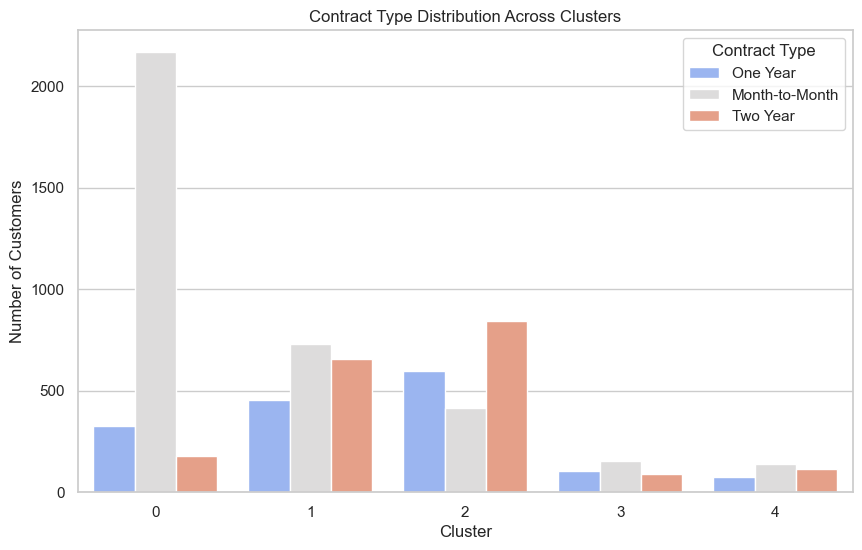

In [269]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['KMeans_Cluster'], hue=df['Contract'], palette="coolwarm")
plt.title("Contract Type Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.legend(title="Contract Type")
plt.show()

#### Contract Type Distribution Across Clusters (Bar Chart Summary)
- Cluster 0
Dominated by Month-to-Month contracts, indicating low commitment and high churn risk. Also contains some one- and two-year contracts, but they are minimal.
- Cluster 1
Fairly balanced mix of all three contract types (One Year, Two Year, and Month-to-Month), suggesting a diverse customer base in terms of contract duration and flexibility.
- Cluster 2
Heavily skewed towards Two-Year contracts, with strong presence of One-Year as well. This indicates a committed and stable customer group.
- Clusters 3 & 4
All contract types are present but in much smaller volumes. May represent niche or transitional groups.

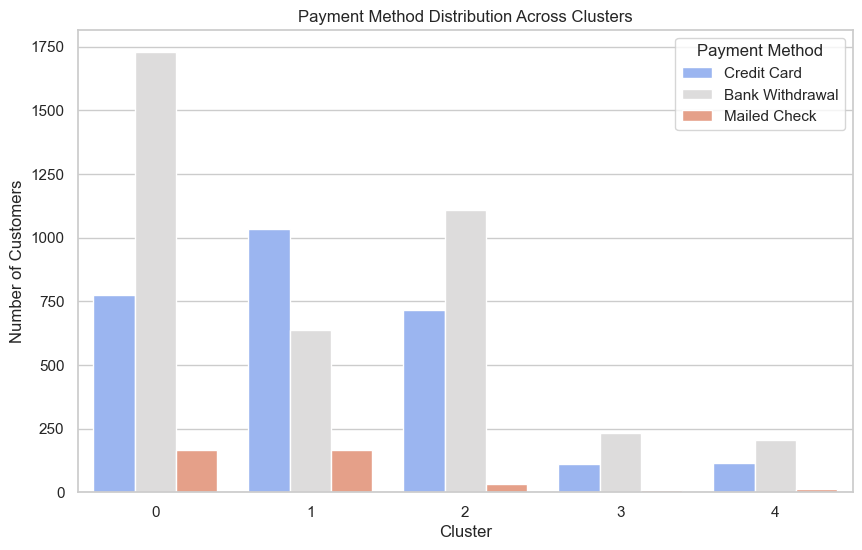

In [272]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['KMeans_Cluster'], hue=df['Payment Method'], palette="coolwarm")
plt.title("Payment Method Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.legend(title="Payment Method")
plt.show()

#### Payment Method Distribution Across Clusters
- Cluster 0
Dominated by Bank Withdrawal, followed by Credit Card. These are auto-pay customers, likely preferring convenience.
- Cluster 1
Strong presence of Credit Card users, followed by Bank Withdrawal. Slightly more traditional mix, with notable Mailed Check users still present.
- Cluster 2
Fairly even distribution between Credit Card and Bank Withdrawal users, with very few Mailed Check customers. Indicates modern payment habits among high-value customers.
- Clusters 3 & 4
Fewer customers overall. Predominantly Bank Withdrawal users with some Credit Card usage. Minimal use of Mailed Checks.

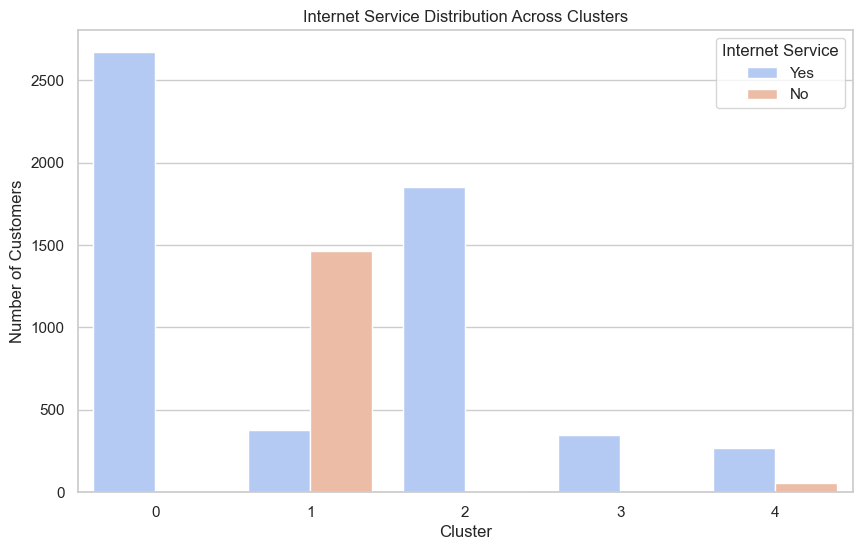

In [275]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['KMeans_Cluster'], hue=df['Internet Service'], palette="coolwarm")
plt.title("Internet Service Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.legend(title="Internet Service")
plt.show()

#### Internet Service Distribution Across Clusters
- Cluster 0
Nearly all customers have internet service → strong digital adoption base.
- Cluster 1
Majority of customers do not have internet service → represents a largely untapped market for digital service expansion.
- Cluster 2
High internet adoption rate → aligns with their usage of other premium digital services.
- Cluster 3 & 4
Mostly internet users → consistent with their moderate engagement in digital offerings.

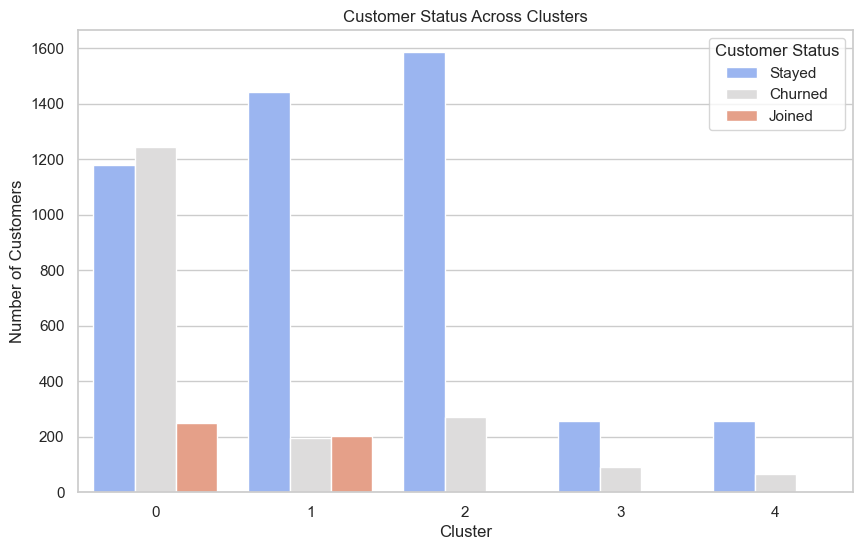

In [278]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['KMeans_Cluster'], hue=df['Customer Status'], palette="coolwarm")
plt.title("Customer Status Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.legend(title="Customer Status")
plt.show()

#### Customer Status Across Clusters
- Cluster 0
High number of churned customers, followed by a large group who stayed. Also notable joined customers — indicates volatility and potential engagement gaps.
- Cluster 1
Most customers stayed, with moderate numbers of churned and joined users. Represents relative stability with room for retention improvement.
- Cluster 2
Dominated by loyal customers who stayed. Very few churned or joined — strong retention and customer satisfaction.
- Cluster 3 & 4
Smaller clusters with primarily stayed customers and a few churned. Possibly niche or less active segments.

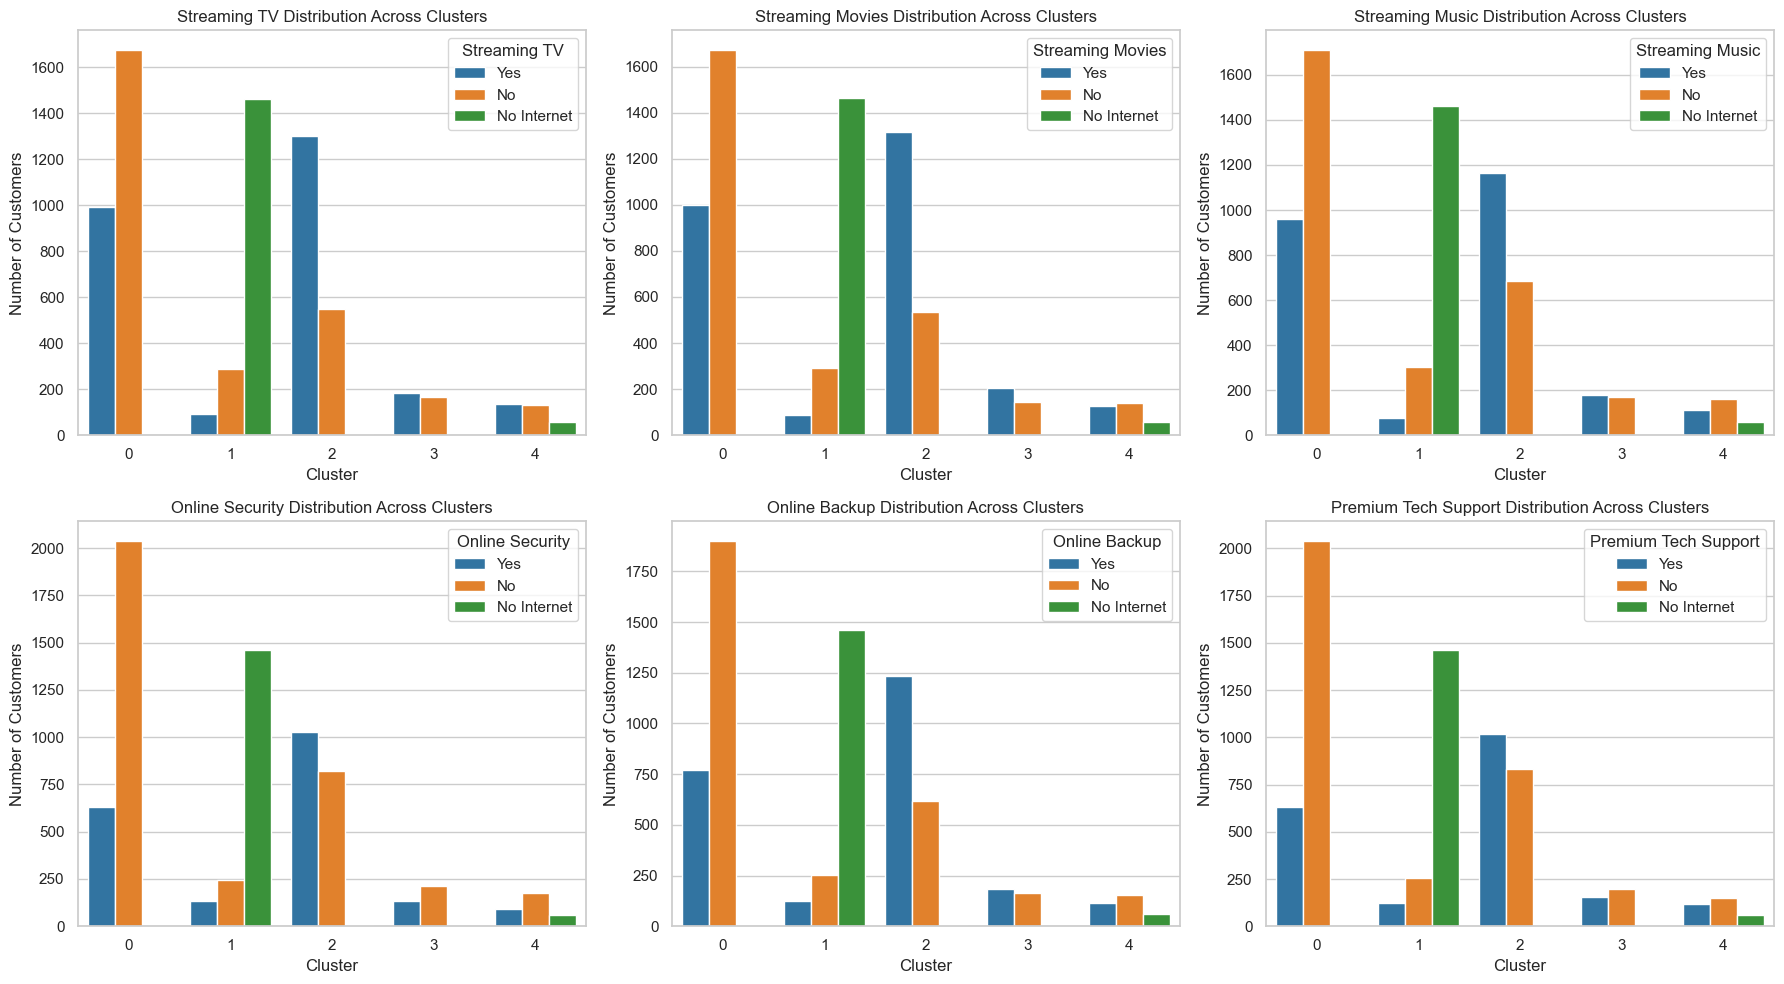

In [281]:
# Define categorical features to analyze
categorical_features = ["Streaming TV", "Streaming Movies", "Streaming Music", 
                        "Online Security", "Online Backup", "Premium Tech Support"]

# Consistent hue order and color palette
hue_order = ["Yes", "No", "No Internet"]
custom_palette = {"Yes": "#1f77b4", "No": "#ff7f0e", "No Internet": "#2ca02c"}  # blue, orange, green

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot with consistent colors and ordering
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x="KMeans_Cluster", hue=feature, hue_order=hue_order,
                  palette=custom_palette, ax=axes[i])
    axes[i].set_title(f"{feature} Distribution Across Clusters")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel("Number of Customers")
    axes[i].legend(title=feature)

plt.tight_layout()
plt.show()

### Cluster Summary: Behavior and Retention Strategy

***Cluster 0*** – Moderately Engaged Digital Users
Most customers have internet service with partial adoption of digital offerings (e.g., streaming and online security). Moderate spenders with short-to-mid tenure.
***Strategy:*** Promote bundled value-add services and upsell opportunities to increase engagement.

***Cluster 1*** – Low Digital Adoption / Non-Internet Users
Majority are non-internet users or show minimal interaction with digital services.
Strategy: Upsell basic internet plans and highlight the benefits of digital engagement.

***Cluster 2*** – Highly Engaged and Loyal Digital Power Users
Extensive use of digital services including streaming, security, backup, and tech support. Long tenure, high spending, and frequent referrals.
Strategy: Retain with VIP programs, loyalty rewards, and early-access offers.

***Cluster 3*** – High Long-Distance Users, Low Digital Engagement
Short-tenure customers with high long-distance usage but low adoption of digital services.
Strategy: Target with international call plans and digital service introductions.

***Cluster 4*** – Refund-Prone with Mixed Engagement
Notable for high refund rates, moderate digital service usage, and relatively short tenure.
Strategy: Prioritize service recovery, resolve pain points, and rebuild trust.

#### Revenue Growth Opportunities (Cluster Summary)

***Cluster 0*** – Upsell Ready Segment<br>
Large base with internet but minimal use of digital services.
- Great upsell potential: streaming, security, backup services
- Low tenure & spending → ideal for bundling, discounts, and digital education

***Cluster 1*** – Untapped, High-Potential Market<br>
Mostly non-internet users or minimal users.
- Sizable segment, often underserved
- Opportunity for digital inclusion & infrastructure investment (e.g., fiber ownership/licensing)
- Could unlock future revenue via strategic onboarding and exclusivity

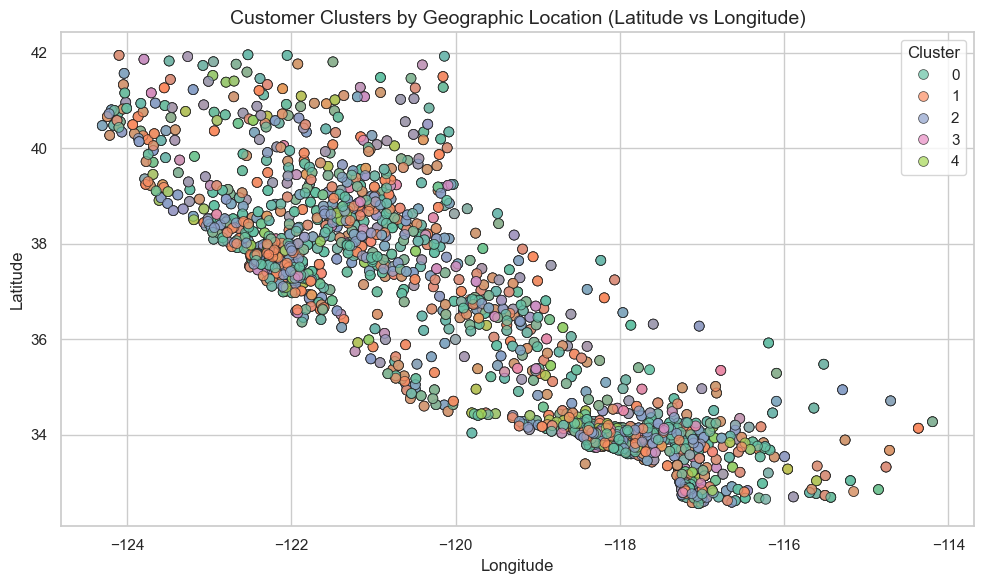

In [284]:
#Spatial Distribution of Clusters (Latitude vs Longitude)
# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot with clusters colored
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    hue="KMeans_Cluster",
    palette="Set2",
    alpha=0.7,
    s=50,
    edgecolor='k'
)

# Titles and labels
plt.title("Customer Clusters by Geographic Location (Latitude vs Longitude)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster", loc='upper right')
plt.tight_layout()
plt.show()

#### Spatial Distribution of Clusters (Latitude vs Longitude)

The geospatial scatter plot shows how customer clusters are distributed across geographic locations. While the clusters do not show strong geographic separation, we can observe the following:<br>
- All clusters are relatively evenly spread across the region, suggesting that location is not a primary differentiator in this clustering.
- There are dense urban-like regions (e.g., around latitude ~34–36 and ~37–39) where all clusters are mixed, possibly indicating cities with diverse customer profiles.
- No single cluster is geographically isolated, so regional strategies may need to consider behavioral and usage factors, not just location.


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---
This project successfully applied **K-Means Clustering** to segment telecom customers into meaningful groups based on usage, spending patterns, service adoption, and demographic factors.

The analysis revealed distinct customer profiles with actionable insights, including:
- Identification of high-value and low-value customer segments.
- Detection of churn-prone customers.
- Differentiation of digital adopters versus non-adopters.
- Observation of geographically influenced behaviors.
>These insights can support:
- More targeted marketing and retention strategies.
- Service personalization for upselling opportunities.
- Strategic investments in underperforming customer groups.


### Future Work
- Explore advanced clustering techniques (e.g., DBSCAN, Hierarchical Clustering).
- Incorporate temporal analysis to detect evolving customer behaviors.
- Integrate external data sources for enrichment (e.g., competitor offers, network usage).
- Deploy clustering results into a production recommendation or CRM system.
---

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---
- Kaggle Telecom Dataset - Source of the dataset.
- Scikit-learn Documentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
- Matplotlib Documentation: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
- Seaborn Documentation: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)
- Power BI Documentation: [https://learn.microsoft.com/en-us/power-bi/](https://learn.microsoft.com/en-us/power-bi/)
---

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
